<a href="https://colab.research.google.com/github/Imran012x/butterfly/blob/main/1_CNN%2Btransfer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experimental

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Set Random Seed for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 📌 Extract the ZIP File
zip_file = "/content/drive/MyDrive/data_raw.zip"
extract_folder = "butterfly_dataset"

if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

# Define dataset path after extraction
# train_data_dir = os.path.join(extract_folder, "data_raw")
train_data_dir = "/content/butterfly_dataset/mixed"


# 📌 Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% Train, 20% Validation
)

# 📌 Load Data from Extracted Folders
batch_size = 32
img_size = (224, 224)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

# 📌 CNN Model Definition
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Train the Model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100, batch_size=batch_size, verbose=1)

# 📌 Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# 📌 Plot Training vs Validation Accuracy/Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.show()

# 📌 Generate Predictions for Test Data
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# 📌 Confusion Matrix & Performance Metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# 📌 Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(4), yticklabels=range(4))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📌 Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# 📌 Save Model
model.save("butterfly_classifier.h5")


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0

#Unsupervised Learning

Image shape: (2038, 224, 224, 3)
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step
Found 1630 validated image filenames belonging to 4 classes.
Found 408 validated image filenames belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.3692 - loss: 13.5296 - val_accuracy: 0.3529 - val_loss: 7.7848
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 477ms/step - accuracy: 0.4638 - loss: 1.1152 - val_accuracy: 0.3358 - val_loss: 11.1564
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 476ms/step - accuracy: 0.4918 - loss: 1.0199 - val_accuracy: 0.3137 - val_loss: 13.2186
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 477ms/step - accuracy: 0.4700 - loss: 1.0422 - val_accuracy: 0.2843 - val_loss: 13.6404
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - accuracy: 0.5028 - loss: 1.0018 - val_accuracy: 0.2868 - val_loss: 11.8655
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 475ms/step - accuracy: 0.4859 - loss: 1.0276 - val_accuracy: 0.3358 - val_loss: 6.6685
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 476ms/step - accuracy: 0.5352 - loss: 0.9527 - val_accuracy: 0.3578 - val_loss: 2.9636
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 24s 477ms/step - accuracy: 0.5302 - loss: 0.93

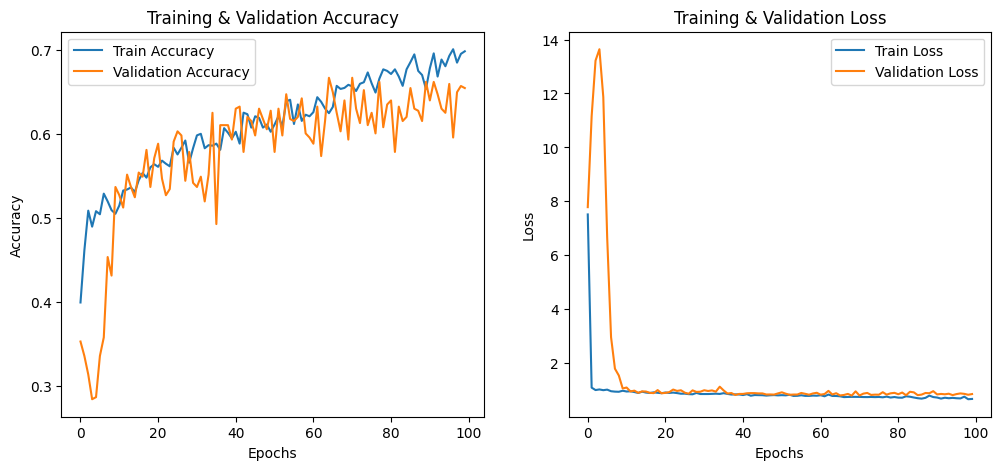

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step
Test Accuracy: 0.2549, F1 Score: 0.2511


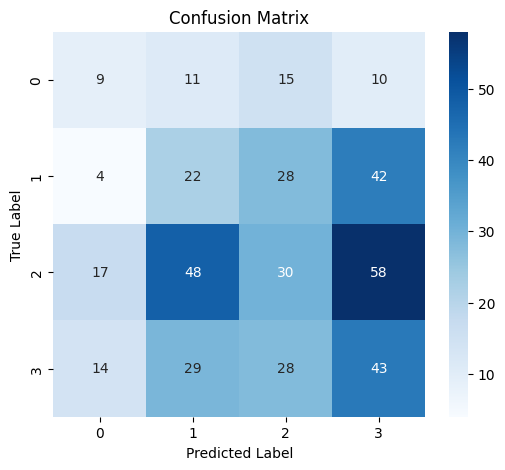


Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.20      0.20        45
           1       0.20      0.23      0.21        96
           2       0.30      0.20      0.24       153
           3       0.28      0.38      0.32       114

    accuracy                           0.25       408
   macro avg       0.25      0.25      0.24       408
weighted avg       0.26      0.25      0.25       408



In [26]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Set Random Seed for Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 📌 Extract the ZIP File
zip_file = "/content/drive/MyDrive/mixed.zip"  # Update this path
extract_folder = "butterfly_dataset"

if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

# 📌 Generate Labels from Filenames
image_folder = "butterfly_dataset/mixed"  # Path where images are stored

# Get all image filenames
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.webp'))]



# Load images and preprocess them for feature extraction
img_size = (224, 224)
images = []
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)  # Convert image to array
    img_array = preprocess_input(img_array)  # Apply ResNet preprocessing
    images.append(img_array)

# Convert list of images into a numpy array
images = np.array(images)

# Ensure the shape is correct (num_images, height, width, channels)
print(f"Image shape: {images.shape}")

# 📌 Use Pre-trained ResNet50 for Feature Extraction
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False  # Freeze the layers

# Extract features from the images
features = resnet_model.predict(np.array(images), batch_size=32)

# Flatten the features for clustering
features_flat = features.reshape(features.shape[0], -1)



# 📌 Apply KMeans Clustering to Group Images into Clusters (Pseudo-Labels)
num_clusters = 4  # Set the number of clusters (adjust as needed)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pseudo_labels = kmeans.fit_predict(features_flat)

# 📌 Create a DataFrame with the pseudo-labels
df = pd.DataFrame({'filename': image_files, 'label': pseudo_labels})

# Split into train and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 📌 Image Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 📌 Load Data from DataFrame (Single Folder)
batch_size = 32

train_df["label"] = train_df["label"].astype(str)
val_df["label"] = val_df["label"].astype(str)

train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=image_folder,
    x_col="filename",
    y_col="label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    directory=image_folder,
    x_col="filename",
    y_col="label",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# 📌 CNN Model Definition
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_clusters, activation='softmax')  # Number of clusters as output classes
])

# 📌 Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 📌 Train the Model
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100, batch_size=batch_size, verbose=1)

# 📌 Evaluate the Model
val_loss, val_accuracy = model.evaluate(val_generator, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}")

# 📌 Plot Training vs Validation Accuracy/Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.show()

# 📌 Generate Predictions for Test Data
y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=1)

# 📌 Confusion Matrix & Performance Metrics
conf_matrix = confusion_matrix(y_true, y_pred)
acc = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Test Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

# 📌 Plot Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📌 Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

# 📌 Save Model
model.save("butterfly_classifier.h5")


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing import image
from google.colab import files  # Use this for Google Colab

# 📌 Load the trained model
model = tf.keras.models.load_model("butterfly_classifier.h5")

# 📌 Define class names (must match the folder names used during training)
class_names = ['common', 'painted', 'red_based', 'red_spot']  # Modify if needed

# 📌 Function to Upload & Predict
def upload_and_predict():
    uploaded = files.upload()  # Opens a file uploader dialog

    for filename in uploaded.keys():
        # Load and preprocess the image
        img_path = filename
        img = image.load_img(img_path, target_size=(224, 224))  # Resize image
        img_array = image.img_to_array(img) / 255.0  # Normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for batch

        # 📌 Make Prediction
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)  # Get the class index
        class_label = class_names[predicted_class]

        # 📌 Display Image with Prediction
        plt.imshow(cv2.imread(img_path)[:, :, ::-1])  # Convert BGR to RGB
        plt.title(f"Predicted: {class_label}")
        plt.axis("off")
        plt.show()

        print(f"🔹 Model Prediction: {class_label} (Confidence: {max(prediction[0]) * 100:.2f}%)")

# 📌 Run the function
upload_and_predict()


#Final

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from google.colab import files

# # Upload a file
# uploaded = files.upload()

# # Get the file name
# file_name = list(uploaded.keys())[0]
# print(f"Uploaded file: {file_name}")


In [ ]:
import zipfile
import os


with zipfile.ZipFile('/content/drive/MyDrive/data_raw.zip', 'r') as zip_ref:
    zip_ref.extractall('')


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
common_pic= os.listdir('/content/common/')
print(common_pic[0:5])
print(common_pic[-5:])
painted_pic= os.listdir('/content/painted/')
red_based_pic= os.listdir('/content/red_based/')
red_spot_pic= os.listdir('/content/red_spot/')

['medium77.jpg', '13601_small.JPG.jpg', 'Delias20eucharis_1711145084_268153.jpg', 'square18.jpg', 'medium90.jpeg']
['medium202.jpeg', 'medium20.jpg', 'medium187.jpeg', 'medium167.jpeg', 'medium337.jpeg']


In [ ]:
print('Common  Jezebel_Delias eucharis images:', len(common_pic))
print('Painted Jezebel_Delias hyparete images:', len(painted_pic))
print('Red-Based  Jezebel_Delias pasithoe images:', len(red_based_pic))
print('Red-Spot Jezebel_Delias descombesi images:', len(red_spot_pic))

Common  Jezebel_Delias eucharis images: 375
Painted Jezebel_Delias hyparete images: 461
Red-Based  Jezebel_Delias pasithoe images: 718
Red-Spot Jezebel_Delias descombesi images: 484


In [ ]:
common_pic_labels = [0]*len(common_pic)
painted_pic_labels = [1]*len(painted_pic)
red_based_pic_labels = [2]*len(red_based_pic)
red_spot_pic_labels = [3]*len(red_spot_pic)


print(common_pic_labels[0:5])

print(painted_pic_labels[0:5])

print(red_based_pic_labels[0:5])

print(red_spot_pic_labels[0:5])


[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]


In [ ]:
labels = common_pic_labels + painted_pic_labels + red_based_pic_labels + red_spot_pic_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

2038
[0, 0, 0, 0, 0]
[3, 3, 3, 3, 3]


In [ ]:
import random
import os
from PIL import Image
import numpy as np

# Parameters (set different numbers for each class)
common_image_number = len(common_pic)
painted_image_number = len(painted_pic)
red_based_image_number = len(red_based_pic)
red_spot_image_number = len(red_spot_pic)


# Initialize the list to store the images
data = []

def process_images(image_path, image_number):
    image_labels = sorted(os.listdir(image_path))  # Ensure images are in order
    random.shuffle(image_labels)  # Shuffle to get random ones
    selected_images = []
    for img_file in image_labels[:image_number]:
        image = Image.open(os.path.join(image_path, img_file))
        image = image.resize((224, 224))
        image = image.convert('RGB')
        image = np.array(image)
        selected_images.append(image)
    return selected_images

# Process images for each category
data.extend(process_images('/content/common/', common_image_number))
data.extend(process_images('/content/painted/', painted_image_number))
data.extend(process_images('/content/red_based/', red_based_image_number))
data.extend(process_images('/content/red_spot/', red_spot_image_number))

In [ ]:
# Convert labels to numpy array for easy processing
labels = np.array(labels)

# Count the number of images in each class
unique, counts = np.unique(labels, return_counts=True)

# Print the number of images for each class
class_counts = dict(zip(unique, counts))
print(f"Class counts: {class_counts}")
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)
print(X.shape)
print(Y.shape)

Class counts: {0: 375, 1: 461, 2: 718, 3: 484}
(2038, 224, 224, 3)
(2038,)


(2038, 224, 224, 3) (1630, 224, 224, 3) (408, 224, 224, 3)


array([[[118, 159,  89],
        [108, 149,  80],
        [101, 142,  71],
        ...,
        [ 53,  84,  25],
        [ 55,  86,  27],
        [ 57,  88,  29]],

       [[116, 157,  87],
        [107, 148,  78],
        [ 99, 139,  69],
        ...,
        [ 53,  84,  25],
        [ 55,  86,  27],
        [ 57,  88,  29]],

       [[108, 149,  78],
        [ 99, 139,  69],
        [ 90, 128,  59],
        ...,
        [ 53,  84,  25],
        [ 55,  86,  27],
        [ 57,  88,  29]],

       ...,

       [[117, 120,  77],
        [139, 140, 107],
        [193, 192, 174],
        ...,
        [ 51,  74,  30],
        [ 51,  73,  30],
        [ 89, 111,  69]],

       [[130, 133,  92],
        [186, 186, 156],
        [222, 220, 204],
        ...,
        [ 52,  75,  31],
        [ 56,  79,  35],
        [ 85, 108,  66]],

       [[127, 129,  89],
        [161, 162, 132],
        [227, 225, 209],
        ...,
        [ 53,  76,  32],
        [ 53,  76,  32],
        [ 76,  99,  56]]], dtype=uint8)
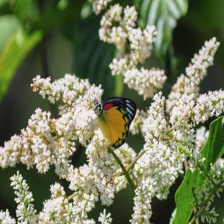

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_train[0]

#Optuna-Hyper parameter Training

In [ ]:
# !pip install optuna
# import optuna
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import RMSprop
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Define model creation function
# def create_model(learning_rate, num_filters, kernel_size):
#     input_shape = (224, 224, 3)
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

#     x = base_model.output
#     x = Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = Conv2D(num_filters * 2, (kernel_size, kernel_size), activation='relu', padding='same')(x)
#     x = MaxPooling2D((2, 2))(x)
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     output = Dense(4, activation='softmax')(x)

#     model = Model(inputs=base_model.input, outputs=output)

#     for layer in base_model.layers:
#         layer.trainable = False

#     model.compile(optimizer=RMSprop(learning_rate=learning_rate),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Define Optuna objective function
# def objective(trial):
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
#     num_filters = trial.suggest_int('num_filters', 16, 128)
#     kernel_size = trial.suggest_categorical('kernel_size', [3, 7])

#     model = create_model(learning_rate, num_filters, kernel_size)
#     model.fit(X_train_scaled, Y_train, epochs=8, validation_data=(X_test_scaled, Y_test), verbose=0)
#     score = model.evaluate(X_test_scaled, Y_test, verbose=0)
#     return score[1]

# # Run Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=30)

# # Get best parameters
# best_params = study.best_params
# print("Best hyperparameters: ", best_params)

# # Train final model with best parameters
# model = create_model(best_params['learning_rate'], best_params['num_filters'], best_params['kernel_size'])
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=10, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


#ResNet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the ResNet model with transfer learning
input_shape = (224, 224, 3)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=100, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 544ms/step - accuracy: 0.3086 - loss: 1.3944 - val_accuracy: 0.3926 - val_loss: 1.3014
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step - accuracy: 0.3958 - loss: 1.3011 - val_accuracy: 0.4202 - val_loss: 1.2554
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4239 - loss: 1.2484 - val_accuracy: 0.4448 - val_loss: 1.2073
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4537 - loss: 1.2037 - val_accuracy: 0.4877 - val_loss: 1.1696
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.4627 - loss: 1.1734 - val_accuracy: 0.5092 - val_loss: 1.1326
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.4821 - loss: 1.1510 - val_accuracy: 0.5276 - val_loss: 1.1050
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.4960 - loss: 1.1303 - val_accuracy: 0.5429 - val_loss: 1.0730
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5142 - loss: 1.1100 - val_ac

In [ ]:
model.save('resnet.h5')

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step


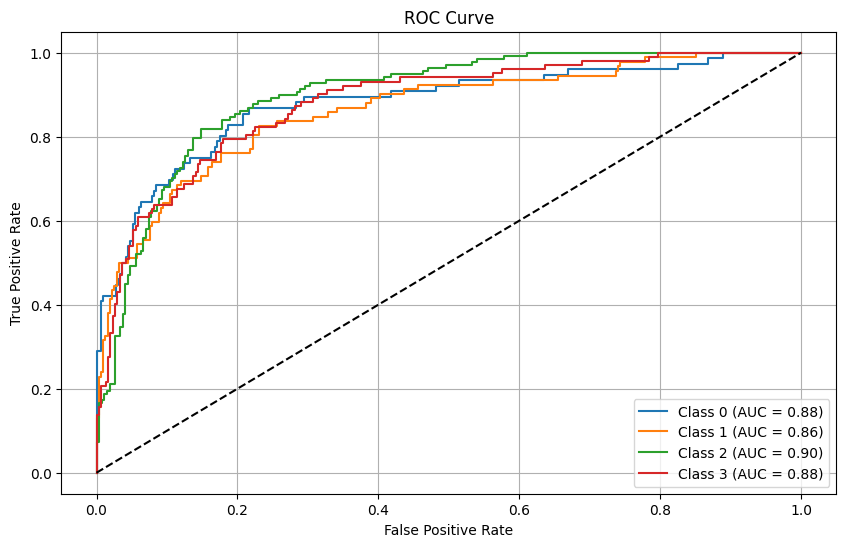

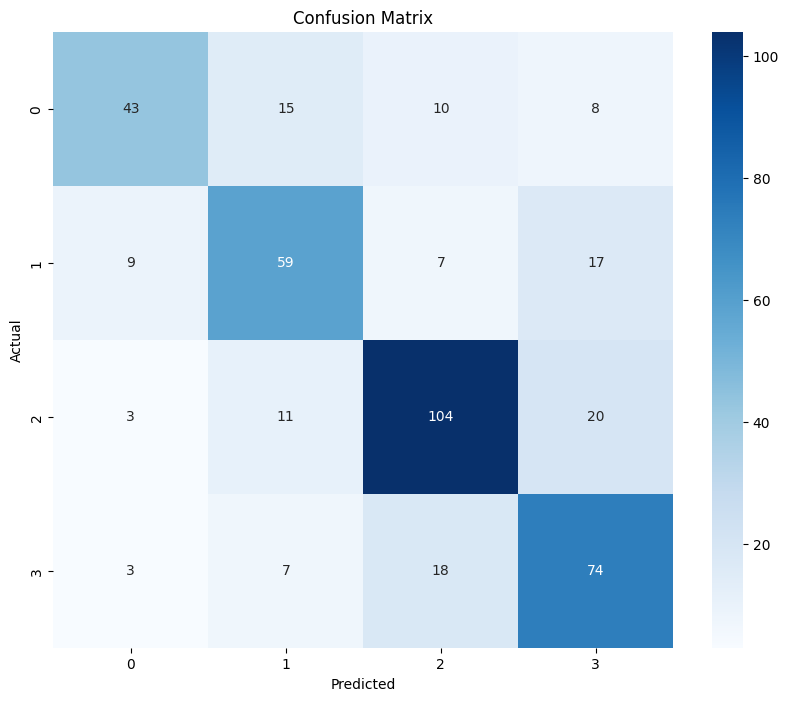

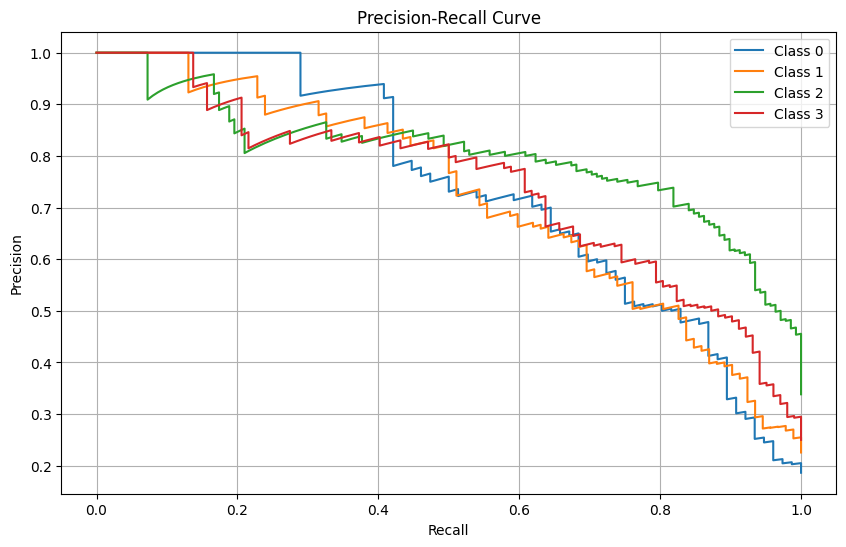

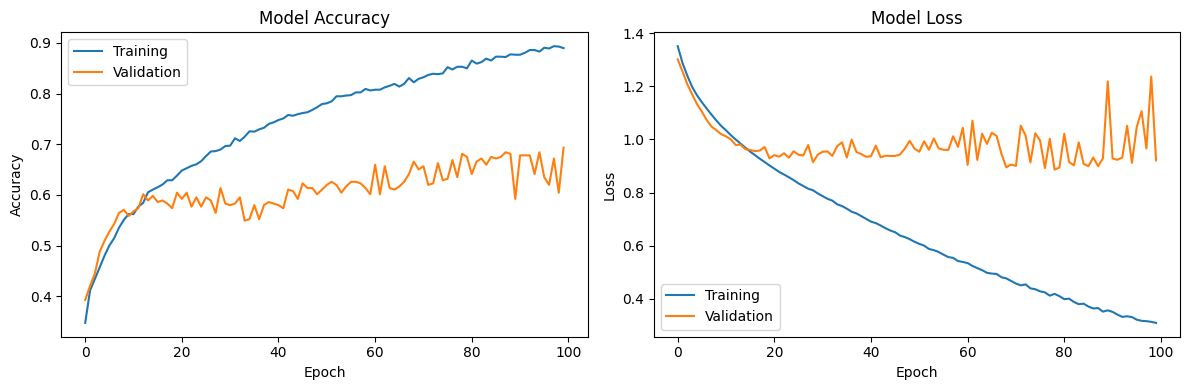


Final Model Performance:
Test Accuracy: 0.6863
F1 Score: 0.6856


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#EfficientNetB0

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
# import seaborn as sns

# # Initialize the EfficientNetB0 model with transfer learning
# input_shape = (224, 224, 3)
# base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# # Add custom CNN layers
# x = base_model.output
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2))(x)
# x = GlobalAveragePooling2D()(x)
# x = Dense(256, activation='relu')(x)
# output = Dense(4, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Freeze base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Compile model
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train model
# history = model.fit(X_train_scaled, Y_train,
#                     validation_split=0.2,
#                     epochs=70, batch_size=32, verbose=1)

# # Evaluate model
# val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
# print(f"Validation Accuracy: {val_accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


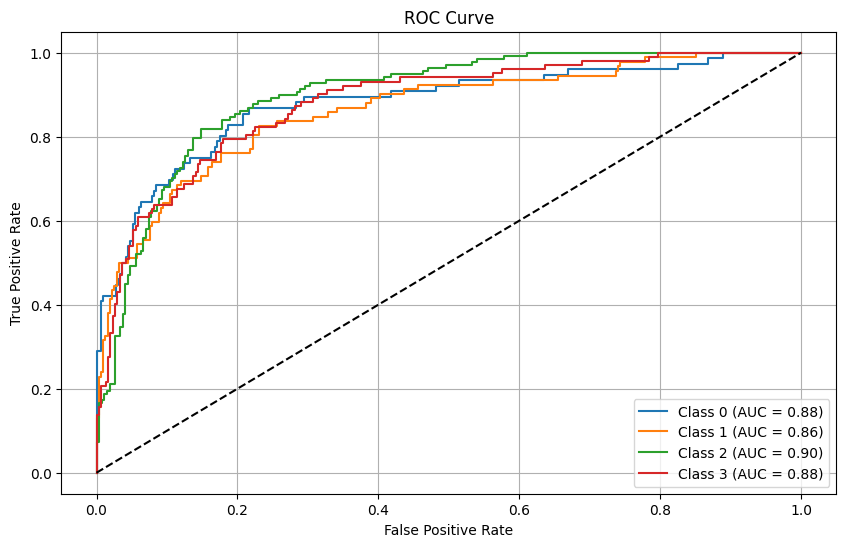

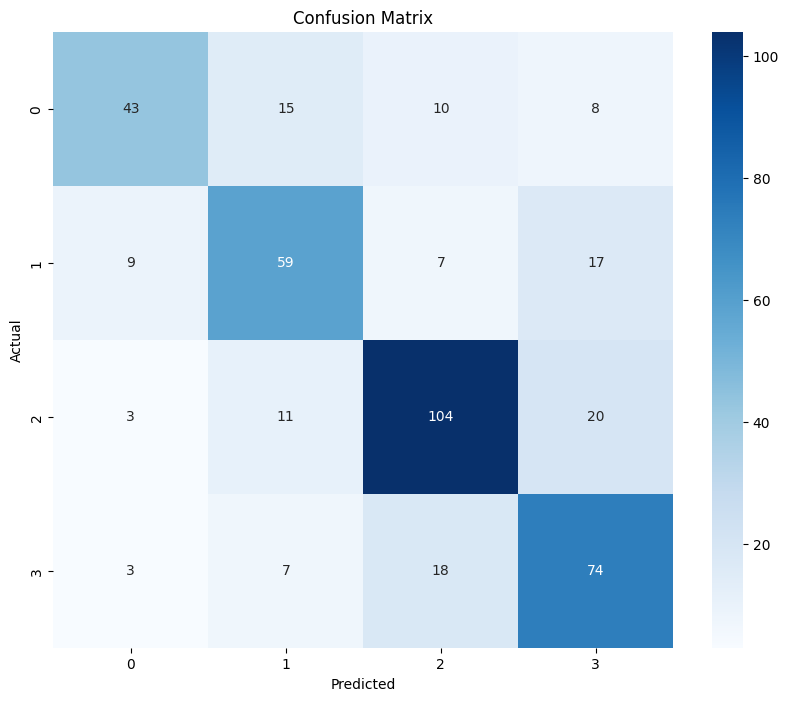

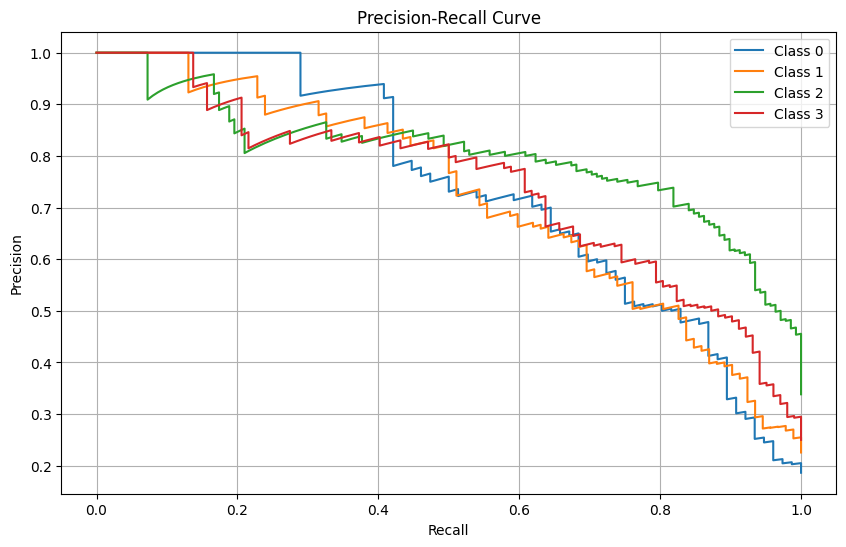

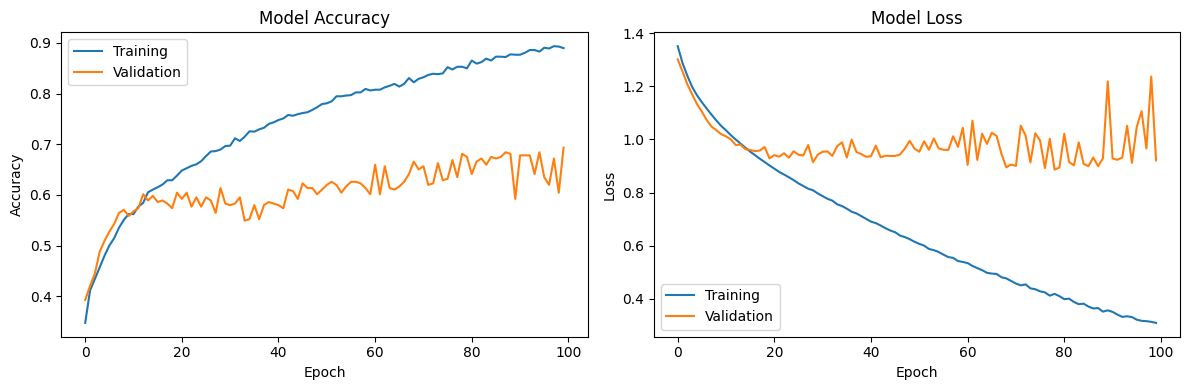


Final Model Performance:
Test Accuracy: 0.6863
F1 Score: 0.6856


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#InceptionV3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the InceptionV3 model with transfer learning
input_shape = (224, 224, 3)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=70, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 625ms/step - accuracy: 0.5734 - loss: 1.0566 - val_accuracy: 0.8436 - val_loss: 0.4243
Epoch 2/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.8854 - loss: 0.2914 - val_accuracy: 0.8006 - val_loss: 0.5667
Epoch 3/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9330 - loss: 0.1973 - val_accuracy: 0.8773 - val_loss: 0.3223
Epoch 4/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9576 - loss: 0.1200 - val_accuracy: 0.8282 - val_loss: 0.4946
Epoch 5/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.9587 - loss: 0.1017 - val_accuracy: 0.8650 - val_loss: 0.4076
Epoch 6/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.9477 - loss: 0.1231 - val_accuracy: 0.8374 - val_loss: 0.6558
Epoch 7/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.9549 - loss: 0.1386 - val_accuracy: 0.8466 - val_loss: 0.5453
Epoch 8/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step -

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 554ms/step


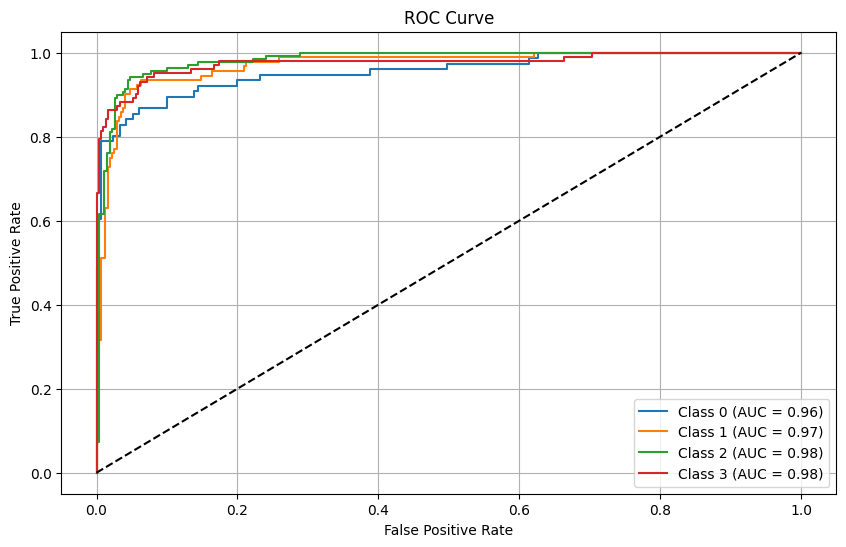

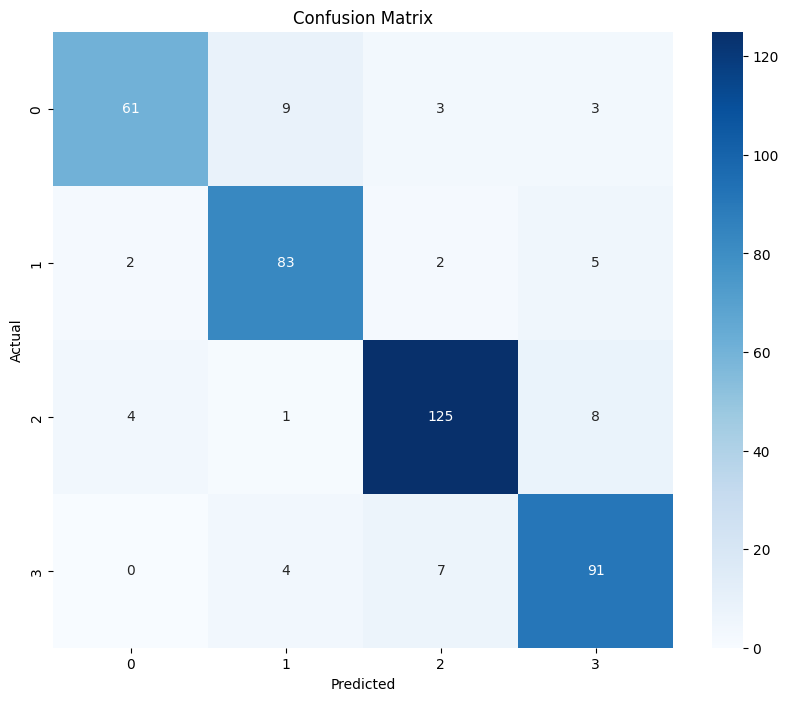

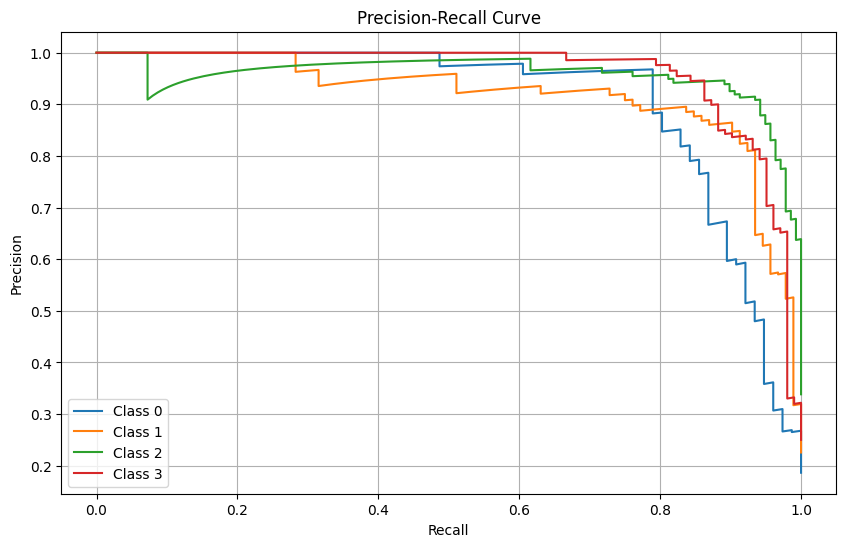

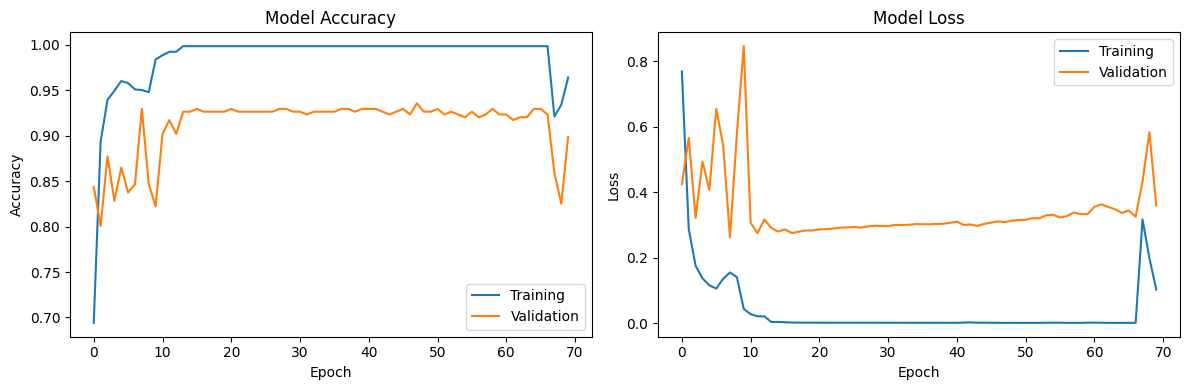


Final Model Performance:
Test Accuracy: 0.8824
F1 Score: 0.8822


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#MobileNetV2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the MobileNetV2 model with transfer learning
input_shape = (224, 224, 3)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=70, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 338ms/step - accuracy: 0.5328 - loss: 1.1652 - val_accuracy: 0.8037 - val_loss: 0.5227
Epoch 2/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9229 - loss: 0.2163 - val_accuracy: 0.8405 - val_loss: 0.4538
Epoch 3/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9396 - loss: 0.1584 - val_accuracy: 0.8865 - val_loss: 0.3076
Epoch 4/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9728 - loss: 0.0740 - val_accuracy: 0.8926 - val_loss: 0.4114
Epoch 5/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9938 - loss: 0.0242 - val_accuracy: 0.9141 - val_loss: 0.2913
Epoch 6/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9940 - loss: 0.0224 - val_accuracy: 0.9172 - val_loss: 0.3633
Epoch 7/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9916 - loss: 0.0193 - val_accuracy: 0.8773 - val_loss: 0.4553
Epoch 8/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accurac

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 489ms/step


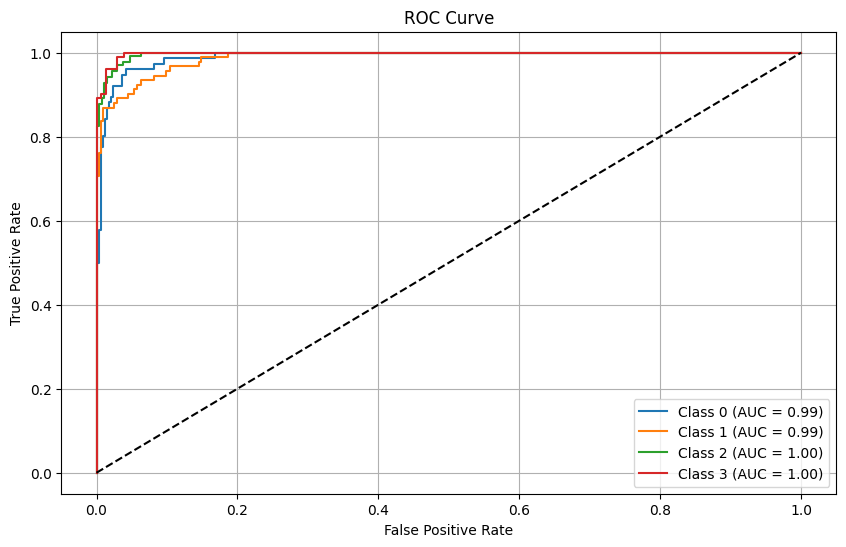

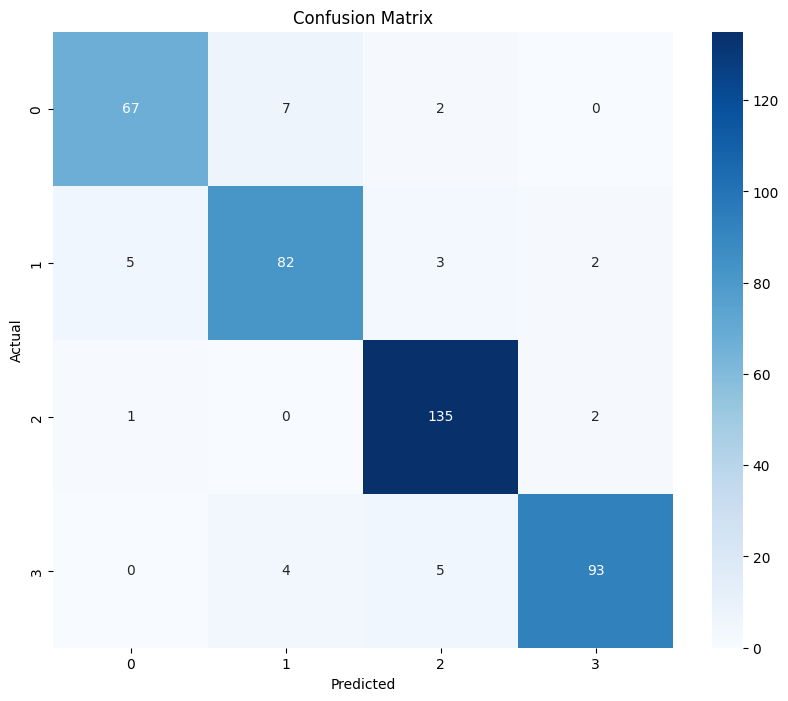

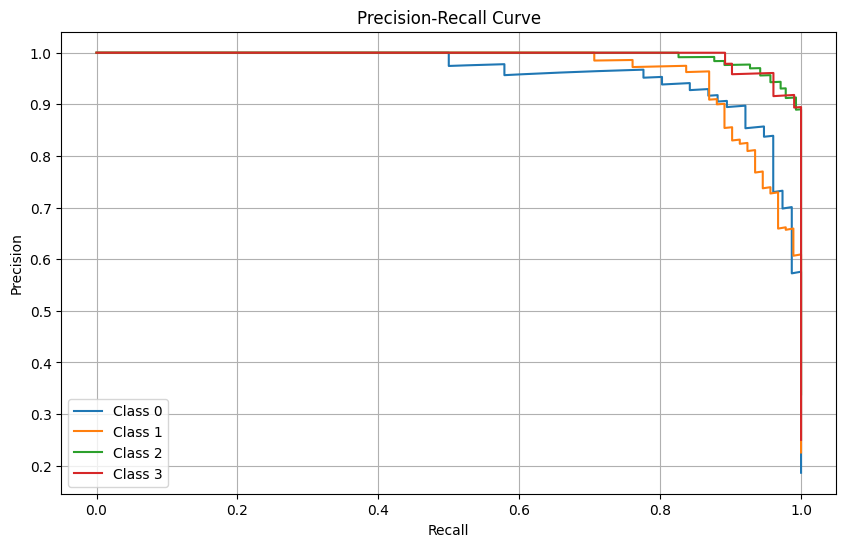

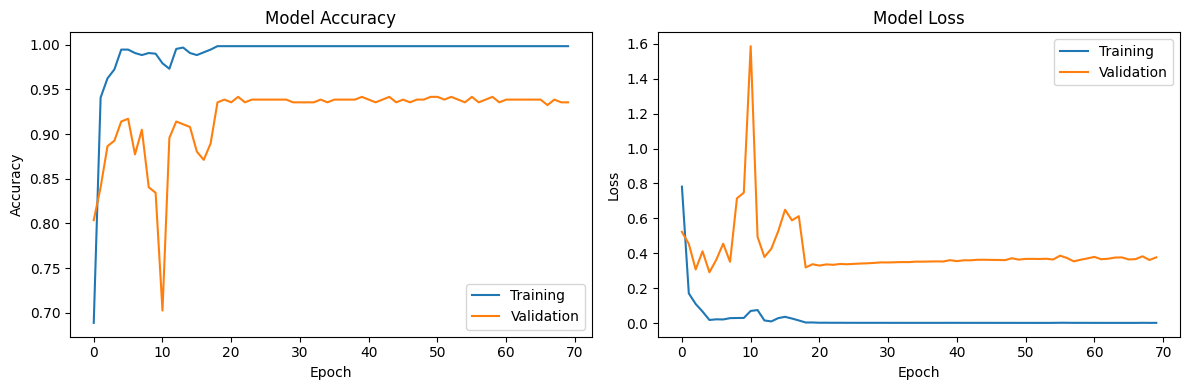


Final Model Performance:
Test Accuracy: 0.9240
F1 Score: 0.9238


In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


#VGG-19

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, accuracy_score, f1_score
import seaborn as sns

# Initialize the VGG16 model with transfer learning
input_shape = (224, 224, 3)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom CNN layers
x = base_model.output
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, Y_train,
                    validation_split=0.2,
                    epochs=70, batch_size=32, verbose=1)

# Evaluate model
val_loss, val_accuracy = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"Validation Accuracy: {val_accuracy:.4f}")


NameError: name 'VGG19' is not defined

In [ ]:

# Generate predictions for visualization
Y_test_pred_prob = model.predict(X_test_scaled)
Y_test_pred = np.argmax(Y_test_pred_prob, axis=1)

# Convert labels for visualization
Y_test_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes=4)

# Visualizations
def plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history):
    # ROC Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        y_true_binary = (np.argmax(Y_test_one_hot, axis=1) == i).astype(int)
        y_score = Y_test_pred_prob[:, i]
        fpr, tpr, _ = roc_curve(y_true_binary, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, Y_test_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    for i in range(4):
        precision, recall, _ = precision_recall_curve(Y_test_one_hot[:, i], Y_test_pred_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.grid()
    plt.show()

    # Training Curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Generate all visualizations
plot_all_visualizations(Y_test, Y_test_one_hot, Y_test_pred, Y_test_pred_prob, history)

# Print final metrics
print("\nFinal Model Performance:")
print(f"Test Accuracy: {accuracy_score(Y_test, Y_test_pred):.4f}")
print(f"F1 Score: {f1_score(Y_test, Y_test_pred, average='weighted'):.4f}")


In [ ]:
# model.save('efficientnetb0.h5')

#End